# Progetto social
## Realizzazione di grafi riguardanti le pubblicazioni degli articoli del dipartimento scientifico
Ricerca tramite piattaforma Scopus di pubblicazioni di articoli scientifici dell'università di udine e analisi dei dati.
### Analisi del dataset
Caricamento dataset e valutazione attendibilità dei paramtri


In [2]:
# Lista delle librerie da controllare
import importlib
import subprocess
import sys

# Dizionario: nome_pip -> nome_import
required_packages = {
    "pandas": "pandas",
    "networkx": "networkx",
    "pyvis": "pyvis",
    "matplotlib": "matplotlib",
    "numpy": "numpy",
    "plotly": "plotly",
    "ipython": "IPython",
    "scipy": "scipy"
}

for pip_name, import_name in required_packages.items():
    try:
        importlib.import_module(import_name)
        print(f"{pip_name} già installato ✅")
    except ImportError:
        print(f"{pip_name} non trovato. Installazione in corso...")
        subprocess.check_call(
            [sys.executable, "-m", "pip", "install", pip_name]
        )
        print(f"{pip_name} installato correttamente ✅")

pandas già installato ✅
networkx già installato ✅
pyvis già installato ✅
matplotlib già installato ✅
numpy già installato ✅
plotly già installato ✅
ipython già installato ✅
scipy già installato ✅


In [3]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import os
from IPython.display import display
import itertools
import plotly.graph_objects as go
import scipy
from plotly.subplots import make_subplots

In [4]:
#caricamento dataset grezzo
df=pd.read_csv('dataset.csv')
df.head()

Authors  \
0                           Lancia, G.; Dalpasso, M.   
1  Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...   
2  Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...   
3  Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...   
4              Faletič, S.; Micheli, M.; Pospiec, G.   

                                   Author full names  \
0  Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...   
1  Da Ros, Francesca (58134137500); Di Gaspero, L...   
2  Bacchetti, Emiliano (59995162800); de Nardin, ...   
3  Ozkilinc, Ozge (58138235700); Soler, Miguel A....   
4  Faletič, Sergej (56595108900); Micheli, Marisa...   

                                        Author(s) ID  \
0                             6701584197; 6603897248   
1  58134137500; 6505944235; 57194560339; 57188717...   
2  59995162800; 57259162600; 55883317500; 2448058...   
3  58138235700; 8718855800; 7004488307; 572046647...   
4              56595108900; 59664609000; 59665606800   

                                               Title  Year  \
0  Speeding Up Floyd–Warshall’s Algorithm to Comp...  2025   
1  Dynamic Temperature Control of Simulated Annea...  2025   
2  A Deep Learning Model Integrating Clinical and...  2025   
3  The Single-Parameter Bragg–Williams Model for ...  2025   
4  Teaching and learning quantum entanglement: a ...  2025   

                                  Source title Volume Issue Art. No.  \
0                                   Algorithms     18     9      560   
1                                          NaN    NaN   NaN      NaN   
2                                      Cancers     17    13     2257   
3  International Journal of Molecular Sciences     26     3      997   
4        Journal of Physics: Conference Series   2950     1   012025   

  Page start  ...                          ISBN  CODEN   PubMed ID  \
0        NaN  ...                           NaN    NaN         NaN   
1        184  ...                 9798400714658    NaN         NaN   
2        NaN  ...                           NaN    NaN         NaN   
3        NaN  ...                           NaN    NaN  39940766.0   
4        NaN  ...  9788394593742; 9781628905861    NaN         NaN   

  Language of Original Document                   Abbreviated Source Title  \
0                       English                                 Algorithms   
1                       English  GECCO - Proc. Genetic Evol. Comput. Conf.   
2                       English                                    Cancers   
3                       English                          Int. J. Mol. Sci.   
4                       English                        J. Phys. Conf. Ser.   

      Document Type Publication Stage  \
0           Article             Final   
1  Conference paper             Final   
2           Article             Final   
3           Article             Final   
4  Conference paper             Final   

                                         Open Access  Source  \
0                  All Open Access; Gold Open Access  Scopus   
1                                                NaN  Scopus   
2  All Open Access; Gold Open Access; Green Accep...  Scopus   
3  All Open Access; Gold Open Access; Green Accep...  Scopus   
4                  All Open Access; Gold Open Access  Scopus   

                   EID  
0  2-s2.0-105017372448  
1  2-s2.0-105013077196  
2  2-s2.0-105010643815  
3   2-s2.0-85217742685  
4   2-s2.0-85219573912  

[5 rows x 46 columns]

In [5]:
#Test e analisi per pulizia dataframe
num_articoli = df.shape[0] #numero aritcoli
null_counts = df.isnull().sum() #Conta valori nulli per colonna
zero_counts = (df == 0).sum() # Conta valori pari a 0 per colonna
print(f"Numero di articoli: {num_articoli}")
#Riepilogo dei valori mancanti
missing_summary = pd.DataFrame({
    "null_values": null_counts,
    "zero_values": zero_counts
})
print(missing_summary)

# Soglia: un terzo dei valori
limite = len(df)/3
cols_to_drop = []# Lista delle colonne da eliminare
for col in df.columns:
    num_null = df[col].isna().sum()
    num_zero = 0
    if pd.api.types.is_numeric_dtype(df[col]):
        num_zero = (df[col] == 0).sum()
    unique_vals = df[col].dropna().unique() #toglie le colonne con un solo valore ripetuto
    if len(unique_vals) <= 1:
        cols_to_drop.append(col)
    # Se la somma di nulli + zeri supera limite, togli la colonna
    if (num_null + num_zero) >= limite:
        cols_to_drop.append(col)
df_clean = df.drop(columns=cols_to_drop)
df_clean.to_csv("nuovo_dataset.csv", index=False)
cols_to_drop


Numero di articoli: 143
                               null_values  zero_values
Authors                                  0            0
Author full names                        0            0
Author(s) ID                             0            0
Title                                    0            0
Year                                     0            0
Source title                            20            0
Volume                                  23            0
Issue                                   77            0
Art. No.                                95            0
Page start                              62            0
Page end                                63            0
Page count                               0          143
Cited by                                 0           27
DOI                                     12            0
Link                                     0            0
Affiliations                             0            0
Authors with affiliation

['Issue',
 'Art. No.',
 'Page start',
 'Page end',
 'Page count',
 'Page count',
 'Molecular Sequence Numbers',
 'Molecular Sequence Numbers',
 'Chemicals/CAS',
 'Tradenames',
 'Manufacturers',
 'Funding Details',
 'Funding Texts',
 'Editors',
 'Sponsors',
 'Conference name',
 'Conference date',
 'Conference location',
 'Conference code',
 'ISBN',
 'CODEN',
 'PubMed ID',
 'Language of Original Document',
 'Open Access',
 'Source']

In [6]:
df=pd.read_csv("nuovo_dataset.csv")
num_colonne = df.shape[1]
print("numero di colonne: ", num_colonne)
df.head() #46 da mettere dopo

numero di colonne:  23


Authors  \
0                           Lancia, G.; Dalpasso, M.   
1  Da Ros, F.; Di Gaspero, L.; Kletzander, L.; La...   
2  Bacchetti, E.; de Nardin, A.; Giannarini, G.; ...   
3  Ozkilinc, O.; Soler, M.A.; Giannozzi, P.; Apar...   
4              Faletič, S.; Micheli, M.; Pospiec, G.   

                                   Author full names  \
0  Lancia, Giuseppe G. (6701584197); Dalpasso, Ma...   
1  Da Ros, Francesca (58134137500); Di Gaspero, L...   
2  Bacchetti, Emiliano (59995162800); de Nardin, ...   
3  Ozkilinc, Ozge (58138235700); Soler, Miguel A....   
4  Faletič, Sergej (56595108900); Micheli, Marisa...   

                                        Author(s) ID  \
0                             6701584197; 6603897248   
1  58134137500; 6505944235; 57194560339; 57188717...   
2  59995162800; 57259162600; 55883317500; 2448058...   
3  58138235700; 8718855800; 7004488307; 572046647...   
4              56595108900; 59664609000; 59665606800   

                                               Title  Year  \
0  Speeding Up Floyd–Warshall’s Algorithm to Comp...  2025   
1  Dynamic Temperature Control of Simulated Annea...  2025   
2  A Deep Learning Model Integrating Clinical and...  2025   
3  The Single-Parameter Bragg–Williams Model for ...  2025   
4  Teaching and learning quantum entanglement: a ...  2025   

                                  Source title Volume  Cited by  \
0                                   Algorithms     18         0   
1                                          NaN    NaN         0   
2                                      Cancers     17         0   
3  International Journal of Molecular Sciences     26         0   
4        Journal of Physics: Conference Series   2950         0   

                               DOI  \
0                10.3390/a18090560   
1          10.1145/3712256.3726390   
2          10.3390/cancers17132257   
3             10.3390/ijms26030997   
4  10.1088/1742-6596/2950/1/012025   

                                                Link  ...  \
0  https://www.scopus.com/inward/record.uri?eid=2...  ...   
1  https://www.scopus.com/inward/record.uri?eid=2...  ...   
2  https://www.scopus.com/inward/record.uri?eid=2...  ...   
3  https://www.scopus.com/inward/record.uri?eid=2...  ...   
4  https://www.scopus.com/inward/record.uri?eid=2...  ...   

                                     Author Keywords  \
0  all-pairs shortest paths; FastSet data structu...   
1  combinatorial optimization; empirical analysis...   
2  artificial intelligence; biopsy; magnetic reso...   
3  binary mixtures; Bragg–Williams; eutectic solv...   
4                                                NaN   

                                      Index Keywords  \
0  Computational complexity; Graph algorithms; Al...   
1  Application programs; Artificial intelligence;...   
2  alpha adrenergic receptor blocking agent; pros...   
3  deep eutectic solvent; solvent; Article; Bragg...   
4  Quantum optics; Empirical research; Fundamenta...   

                                          References  \
0  Floyd, Robert W., Algorithm 97: Shortest path,...   
1  Adriaensen, Steven, Fair-share ILS: A simple s...   
2  Cornford, Philip A., EAU-EANM-ESTRO-ESUR-ISUP-...   
3  Abbott, Andrew P., Deep Eutectic Solvents form...   
4  J Phys Conf Ser, (2021); Qtedu Consortium 2021...   

                              Correspondence Address  \
0  G. Lancia; Department of Mathematics, Computer...   
1                                                NaN   
2  G. Giannarini; Urology Unit, University Hospit...   
3  F. Fogolari; Dipartimento di Scienze Matematic...   
4  S. Faletič; University of Ljubljana, Faculty o...   

                                           Publisher                ISSN  \
0  Multidisciplinary Digital Publishing Institute...            19994893   
1           Association for Computing Machinery, Inc                 NaN   
2  Multidisciplinary Digital Publishing Institute...            20726694   
3  Multidi

In [7]:
df["authors_list"] = df["Authors"].str.split(";").apply(
    lambda x: [a.strip().replace(",", "") for a in x]
)
df["authors_list"]


0                               [Lancia G., Dalpasso M.]
1      [Da Ros F., Di Gaspero L., Kletzander L., Lack...
2      [Bacchetti E., de Nardin A., Giannarini G., Ce...
3      [Ozkilinc O., Soler M.A., Giannozzi P., Aparic...
4                   [Faletič S., Micheli M., Pospiec G.]
                             ...                        
138                  [Alpuente M., Ballis D., Sapiña J.]
139               [Dattolo A., de March C., Luccio F.L.]
140    [Altenkirch T., Chaudhuri K., Dowek G., Felty ...
141                                        [Corbatto M.]
142            [Omodeo E.G., Policriti A., Tomescu A.I.]
Name: authors_list, Length: 143, dtype: object

## Creazione del primo grafo
Creazione del grafo per anno che mostra la relazione delle collaborazioni tra autori delle varie pubblicazioni.

In [8]:

# assicura che Year sia numerico
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
grafi_per_anno = {}
for anno, df_anno in df.groupby("Year"):
    G = nx.Graph()
    for authors in df_anno["authors_list"].dropna():
        for a1, a2 in itertools.combinations(authors, 2):
            if G.has_edge(a1, a2):
                G[a1][a2]["weight"] += 1
            else:
                G.add_edge(a1, a2, weight=1)
    grafi_per_anno[anno] = G


In [9]:
## sistemare nomi pallini e archi
pos = nx.circular_layout(
    nx.compose_all(grafi_per_anno.values())
)
def plot_graph_plotly(G):
    edge_x, edge_y = [], []

    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        name="Collaborazioni",
    )

    node_x, node_y, hover_text = [], [], []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        hover_text.append(
            f"{node}<br>Collaborazioni: {G.degree(node)}"
        )

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hoverinfo="text",
        text=hover_text,
        name="Autori",
        marker=dict(
            size=8,
            color="royalblue",
            line=dict(width=0.5, color="black"),
        )
    )

    return edge_trace, node_trace
frames = []

for anno in sorted(grafi_per_anno.keys()):
    edge, node = plot_graph_plotly(grafi_per_anno[anno])
    frames.append(
        go.Frame(
            data=[edge, node],
            name=str(anno)
        )
    )

fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Collaborazioni tra autori nel tempo",
        paper_bgcolor="white",
        plot_bgcolor="white",

        xaxis=dict(
            showgrid=False,
            zeroline=False,
            visible=False
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            visible=False
        ),

        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [
                    None,
                    {
                        "frame": {"duration": 2000, "redraw": True}, 
                        "transition": {"duration": 500},
                        "fromcurrent": True
                    }
                ]
            }]
        }],

        sliders=[{
            "steps": [
                {
                    "method": "animate",
                    "args": [[f.name]],
                    "label": f.name
                }
                for f in frames
            ]
        }]
    )
)

fig.show()



In [10]:

# ==============================
# Layout globale (coerenza tra anni)
# ==============================
G_totale = nx.compose_all(grafi_per_anno.values())
pos = nx.spring_layout(G_totale, seed=42)

# ==============================
# Funzione di plotting
# ==============================
def plot_graph_plotly(G, pos):
    edge_x, edge_y = [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode="lines",
        line=dict(width=1, color="lightgray"),
        hoverinfo="none",
        name="Collaborazioni",
    )

    node_x, node_y = [], []
    hover_text = []
    degrees = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

        deg = G.degree(node)
        degrees.append(deg)
        hover_text.append(f"{node}<br>Collaborazioni: {deg}")

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hoverinfo="text",
        text=hover_text,
        name="Autori",
        marker=dict(
            size=10,                   
            color=degrees,             
            colorscale="Blues",
            cmin=0,                    
            cmax=50,
            showscale=True,
            colorbar=dict(
                title="Collaborazioni",
                thickness=15,
                x=1,          
                y=0.25,       
                xanchor="left",
                yanchor="middle",
                len=1,         
            ),
            line=dict(width=0.5, color="black"),
        )
    )

    return edge_trace, node_trace

# ==============================
# Creazione dei frame (animazione)
# ==============================
frames = []

for anno in sorted(grafi_per_anno.keys()):
    edge, node = plot_graph_plotly(
        grafi_per_anno[anno],
        pos
    )

    frames.append(
        go.Frame(
            data=[edge, node],
            name=str(anno),
            layout=go.Layout(
                title_text=f"Collaborazioni tra autori – {anno}"
            )
        )
    )

# ==============================
# Figura finale
# ==============================
fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        title="Collaborazioni tra autori nel tempo",
        paper_bgcolor="white",
        plot_bgcolor="white",
        xaxis=dict(
            range=[-1.1, 1.1],
            showgrid=False,
            zeroline=False,
            visible=False
        ),
        yaxis=dict(
            range=[-1.1, 1.1],
            showgrid=False,
            zeroline=False,
            visible=False
        ),
        updatemenus=[{
            "type": "buttons",
            "showactive": False,
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [
                    None,
                    {
                        "frame": {"duration": 2000, "redraw": True},
                        "transition": {"duration": 500},
                        "fromcurrent": True
                    }
                ]
            }]
        }],
        sliders=[{
            "steps": [
                {
                    "method": "animate",
                    "args": [[f.name]],
                    "label": f.name
                }
                for f in frames
            ]
        }]
    )
)
fig.show()

## Secondo grafo
Creazione del grafo per centralità di ogni anno che mostra la relazione delle collaborazioni tra autori delle varie pubblicazioni con il nodo centrale.

In [11]:
# ==============================
# Calcolo nodo centrale per anno
# ==============================
central_node_per_anno = {}
for anno, G in grafi_per_anno.items():
    if len(G) > 0:
        central_node_per_anno[anno] = max(G.degree, key=lambda x: x[1])[0]

# ==============================
# Calcolo layout per anno con nodo centrale al centro
# ==============================
pos_per_anno = {}
for anno, G in grafi_per_anno.items():
    if len(G) == 0:
        continue
    central = central_node_per_anno[anno]
    # Posizione iniziale con nodo centrale al centro
    initial_pos = {central: (0,0)}
    # Layout spring locale con nodo centrale fisso
    pos = nx.spring_layout(
        G,
        seed=42,
        pos=initial_pos,
        fixed=[central],
        k=0.5,
        iterations=100
    )

    # Normalizza posizioni per stare dentro [-1,1] x [-1,1]
    xs = [x for x, y in pos.values()]
    ys = [y for x, y in pos.values()]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    for node in pos:
        x, y = pos[node]
        norm_x = -1 + 2 * (x - min_x) / (max_x - min_x) if max_x > min_x else 0
        norm_y = -1 + 2 * (y - min_y) / (max_y - min_y) if max_y > min_y else 0
        pos[node] = (norm_x, norm_y)

    pos_per_anno[anno] = pos
# ==============================
# Funzione di plotting
# ==============================
def plot_graph_plotly(G, pos):
    edge_x, edge_y = [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        name="Collegamenti",
        showlegend=True
    )

    max_degree = max(dict(G.degree()).values())
    node_x, node_y, texts, colors = [], [], [], []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        deg = G.degree(node)
        texts.append(f"{node}<br>Grado: {deg}")
        colors.append("crimson" if deg == max_degree else "royalblue")

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode="markers",
        text=texts,
        hoverinfo="text",
        name="Nodi",
        showlegend=True,
        marker=dict(size=9, color=colors, line=dict(width=0.5, color="black"))
    )

    return edge_trace, node_trace
# ==============================
# Creazione dei frame
# ==============================
frames = []
for anno in sorted(grafi_per_anno.keys()):
    G = grafi_per_anno[anno]
    pos = pos_per_anno[anno]
    edge, node = plot_graph_plotly(G, pos)

    max_degree = max(dict(G.degree()).values())
    top_nodes = [n for n in G.nodes() if G.degree(n) == max_degree]
    top_nodes_title = ', '.join(top_nodes[:3]) + ', ...' if len(top_nodes) > 3 else ', '.join(top_nodes)

    frames.append(
        go.Frame(
            data=[edge, node],
            name=str(anno),
            layout=go.Layout(
                title=f"Collaborazioni – {anno}<br>Nodi centrali: {top_nodes_title}"
            )
        )
    )

# ==============================
# Figura finale
# ==============================
fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        paper_bgcolor="white",
        plot_bgcolor="white",
        xaxis=dict(visible=False, range=[-1.1,1.1]),
        yaxis=dict(visible=False, range=[-1.1,1.1]),
        updatemenus=[{
            "type":"buttons",
            "buttons":[{
                "label":"Play",
                "method":"animate",
                "args":[None, {"frame":{"duration":2000,"redraw":True}, "transition":{"duration":500}, "fromcurrent":True}]
            }]
        }],
        sliders=[{
            "steps":[{"method":"animate","args":[[f.name]],"label":f.name} for f in frames]
        }]
    )
)

fig.show()


Grafo 2 statico:
Rappresentazione di un sottografo rappresentate in rosso gli autori più centrali per ogni anno

In [12]:
# =========================
# Nodo centrale per anno
# =========================
central_node_per_anno = {}
for anno, G in grafi_per_anno.items():
    if len(G) == 0:
        continue
    central_node_per_anno[anno] = max(G.degree, key=lambda x: x[1])[0]

# =========================
# Vicini equicentrali del nodo centrale
# =========================
highlight_nodes_per_anno = {}
for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    central_degree = G.degree(central)
    equicentral_neighbors = [
        n for n in G.neighbors(central)
        if G.degree(n) == central_degree
    ]
    highlight_nodes_per_anno[anno] = [central] + equicentral_neighbors

# =========================
# Sottografo: centrale + vicini
# =========================
subgrafi_per_anno = {}
pos_per_anno = {}

for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    neighbors = list(G.neighbors(central))
    nodes = [central] + neighbors
    H = G.subgraph(nodes).copy()
    subgrafi_per_anno[anno] = H

    initial_pos = {central: (0, 0)}
    pos = nx.spring_layout(H, seed=42, pos=initial_pos, fixed=[central])
    pos_per_anno[anno] = pos

# =========================
# Funzione Plotly
# =========================
def plot_graph_plotly(G, pos, highlight_nodes):
    edge_x, edge_y = [], []
    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        showlegend=False
    )

    node_x, node_y, texts, colors, sizes = [], [], [], [], []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        texts.append(f"{node}<br>Grado: {G.degree(node)}")

        if node in highlight_nodes:
            colors.append("crimson")
            sizes.append(11)
        else:
            colors.append("royalblue")
            sizes.append(8)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode="markers",
        text=texts,
        hoverinfo="text",
        marker=dict(
            size=sizes,
            color=colors,
            line=dict(width=0.5, color="black")
        ),
        showlegend=False
    )

    return edge_trace, node_trace

# =========================
# Genera titoli subplot
# =========================
authors_per_anno = {}
for anno, G in grafi_per_anno.items():
    if anno not in central_node_per_anno:
        continue
    central = central_node_per_anno[anno]
    central_degree = G.degree(central)
    equicentral_neighbors = [
        n for n in G.neighbors(central)
        if G.degree(n) == central_degree
    ]
    all_authors = [central] + equicentral_neighbors
    authors_per_anno[anno] = all_authors


anni = sorted(grafi_per_anno.keys())


titoli = []
for anno in anni:
    authors = authors_per_anno.get(anno, [])
    # massimo 3 autori
    if len(authors) > 3:
        authors = authors[:3] + ["..."]
    # raggruppa ogni 2 autori per riga
    lines = []
    for i in range(0, len(authors), 2):
        lines.append(", ".join(authors[i:i+2]))
    titolo = f"{anno}<br>" + "<br>".join(lines)
    titoli.append(titolo)

# =========================
# Crea figura 2x5
# =========================
fig = make_subplots(
    rows=2, cols=5,
    subplot_titles=titoli,
    horizontal_spacing=0.03,
    vertical_spacing=0.08
)

for i, anno in enumerate(anni):
    if anno not in subgrafi_per_anno:
        continue
    G = subgrafi_per_anno[anno]
    pos = pos_per_anno[anno]
    highlight_nodes = highlight_nodes_per_anno[anno]

    edge, node = plot_graph_plotly(G, pos, highlight_nodes)

    row = 1 if i < 5 else 2
    col = i + 1 if i < 5 else i - 4

    fig.add_trace(edge, row=row, col=col)
    fig.add_trace(node, row=row, col=col)

# =========================
# Layout finale
# =========================
fig.update_layout(
    height=650,
    width=1400,
    paper_bgcolor="white",
    plot_bgcolor="white",
    title_x=0.5,
    font=dict(size=10),
    margin=dict(l=20, r=20, t=50, b=20)
)

for r in [1, 2]:
    for c in range(1, 6):
        fig.update_xaxes(visible=False, row=r, col=c)  
        fig.update_yaxes(visible=False, row=r, col=c)  

fig.update_layout(
    margin=dict(t=50, b=20, l=20, r=20),
)

for ann in fig.layout.annotations:
    ann.font = dict(size=12)

fig.show()


## Terzo grafo
Creazione del grafo per l'autore più centrale di tutti gli anni in relazione agli autori che hanno collaborato alle collaborazioni comuni. 

In [13]:
# ==============================
# Grafo totale e autore centrale globale
# ==============================
G_totale = nx.compose_all(grafi_per_anno.values())
central_author = max(G_totale.degree, key=lambda x: x[1])[0]
print("Autore centrale globale:", central_author)

# ==============================
# Creazione grafi cumulativi
# ==============================
grafi_cumulativi = {}
G_cumulativo = nx.Graph()

for anno in sorted(grafi_per_anno.keys()):
    G_cumulativo = nx.compose(G_cumulativo, grafi_per_anno[anno])
    grafi_cumulativi[anno] = G_cumulativo.copy()

# ==============================
# Calcolo layout per anno
# ==============================
pos_per_anno = {}
for anno, G in grafi_cumulativi.items():
    if central_author not in G:
        continue

    nodes_connected = nx.node_connected_component(G, central_author)
    G_sub = G.subgraph(nodes_connected).copy()

    initial_pos = {central_author: (0, 0)}

    pos = nx.spring_layout(
        G_sub,
        seed=42,
        pos=initial_pos,
        fixed=[central_author],
        k=0.5,
        iterations=200
    )

    xs = [x for x, y in pos.values()]
    ys = [y for x, y in pos.values()]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    for node in pos:
        x, y = pos[node]
        norm_x = -1.1 + 2.2 * (x - min_x) / (max_x - min_x) if max_x > min_x else 0
        norm_y = -1.1 + 2.2 * (y - min_y) / (max_y - min_y) if max_y > min_y else 0
        pos[node] = (norm_x, norm_y)

    pos_per_anno[anno] = pos
    grafi_cumulativi[anno] = G_sub  

# ==============================
# Funzione di plotting
# ==============================
def plot_graph_plotly(G, pos, central_node):
    edge_x, edge_y = [], []

    for u, v in G.edges():
        x0, y0 = pos[u]
        x1, y1 = pos[v]
        edge_x += [x0, x1, None]
        edge_y += [y0, y1, None]

    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        mode="lines",
        line=dict(width=1, color="gray"),
        hoverinfo="none",
        name="Collaborazioni",
        showlegend=True
    )

    node_x, node_y, texts, colors, sizes = [], [], [], [], []

    for node in G.nodes():
        if node == central_node:
            continue
        x, y = pos[node]
        deg = G.degree(node)
        node_x.append(x)
        node_y.append(y)
        texts.append(f"{node}<br>Collaborazioni: {deg}")
        colors.append("royalblue")
        sizes.append(8)

    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers",
        hoverinfo="text",
        text=texts,
        marker=dict(
            size=sizes,
            color=colors,
            line=dict(width=0.5, color="black"),
            opacity=1.0
        ),
        name="Autori"
    )

    x_c, y_c = pos[central_node]
    node_central_trace = go.Scatter(
        x=[x_c],
        y=[y_c],
        mode="markers",
        hoverinfo="text",
        text=[f"{central_node}<br>Collaborazioni: {G.degree(central_node)}"],
        marker=dict(
            size=15,
            color="crimson",
            line=dict(width=0.5, color="black"),
            opacity=1.0
        ),
        name="Gigli G.L."
    )

    return edge_trace, node_trace, node_central_trace

# ==============================
# Creazione dei frame
# ==============================
frames = []

for anno in sorted(grafi_cumulativi.keys()):
    G = grafi_cumulativi[anno]
    if anno not in pos_per_anno: 
        continue
    pos = pos_per_anno[anno]
    edge, nodes, central = plot_graph_plotly(G, pos, central_author)
    frames.append(
        go.Frame(
            data=[edge, nodes, central],
            name=str(anno),
            layout=go.Layout(
                title=f"Collaborazioni cumulative fino al {anno}<br>Autore centrale: {central_author}"
            )
        )
    )


# ==============================
# Figura finale
# ==============================
fig = go.Figure(
    data=frames[0].data,
    frames=frames,
    layout=go.Layout(
        paper_bgcolor="white",
        plot_bgcolor="white",
        xaxis=dict(visible=False, range=[-1.5,1.5]),
        yaxis=dict(visible=False, range=[-1.5,1.5]),
        updatemenus=[{
            "type": "buttons",
            "buttons": [{
                "label": "Play",
                "method": "animate",
                "args": [None, {
                    "frame": {"duration":2000, "redraw":True},
                    "transition":{"duration":500},
                    "fromcurrent":True
                }]
            }]
        }],
        sliders=[{
            "steps": [{"method":"animate", "args":[[f.name]], "label":f.name} for f in frames]
        }]
    )
)

fig.show()


Autore centrale globale: Gigli G.L.


In [14]:
df = pd.read_csv("nuovo_dataset.csv")
df["authors_list"] = df["Authors"].str.split(";").apply(
    lambda x: [a.strip().replace(",", "") for a in x]
)
df["authors_list"]

G = nx.Graph()

for authors in df["authors_list"].dropna():
    for a1, a2 in itertools.combinations(authors, 2):
        if G.has_edge(a1, a2):
            G[a1][a2]["weight"] += 1
        else:
            G.add_edge(a1, a2, weight=1)


net = Network(height="750px", width="100%", notebook=True)
net.from_nx(G)
net.show("coauthors_graph.html")


coauthors_graph.html


In [15]:
# calcola coppie e tris di autori più frequenti (usa df e authors_list già presenti nel notebook)

# se authors_list non esiste, la ricrea dalla colonna Authors
if "authors_list" not in df.columns:
    df["authors_list"] = df["Authors"].str.split(";").apply(
        lambda x: [a.strip().replace(",", "") for a in x] if pd.notna(x) else []
    )

pairs = Counter()
triples = Counter()

for authors in df["authors_list"].dropna():
    if not isinstance(authors, list) or len(authors) < 2:
        continue
    # usa autori unici per articolo per evitare duplicati nella stessa entry
    unique_authors = sorted(set(authors))
    # coppie
    for a, b in itertools.combinations(unique_authors, 2):
        pairs[(a, b)] += 1
    # tris
    if len(unique_authors) >= 3:
        for a, b, c in itertools.combinations(unique_authors, 3):
            triples[(a, b, c)] += 1

# parametri di output
top_n_pairs = 20
top_n_triples = 20

# DataFrame di riepilogo coppie
pairs_df = pd.DataFrame(
    [(*pair, cnt) for pair, cnt in pairs.items()],
    columns=["Author1", "Author2", "Count"]
).sort_values("Count", ascending=False).reset_index(drop=True)

# DataFrame di riepilogo tris
triples_df = pd.DataFrame(
    [(*triple, cnt) for triple, cnt in triples.items()],
    columns=["Author1", "Author2", "Author3", "Count"]
).sort_values("Count", ascending=False).reset_index(drop=True)

# mostra i top risultati
print(f"Top {top_n_pairs} coppie di autori per numero di collaborazioni:")
display(pairs_df.head(top_n_pairs))

print(f"\nTop {top_n_triples} tris di autori per numero di collaborazioni:")
display(triples_df.head(top_n_triples))

# opzionale: salva risultati
pairs_df.to_csv("top_author_pairs.csv", index=False)
triples_df.to_csv("top_author_triples.csv", index=False)

Top 20 coppie di autori per numero di collaborazioni:


Author1       Author2  Count
0    Gigli G.L.    Valente M.     31
1    Gigli G.L.     Vogrig A.     12
2   Alpuente M.     Ballis D.      9
3    Gigli G.L.    Merlino G.      8
4   Alpuente M.     Sapiña J.      8
5     Ballis D.     Sapiña J.      8
6    Merlino G.    Valente M.      8
7    Gigli G.L.       Nilo A.      8
8    Gigli G.L.   Lorenzut S.      7
9    Valente M.     Vogrig A.      7
10   Gigli G.L.   Pauletto G.      7
11  Lorenzut S.    Valente M.      7
12   Gigli G.L.     Marini A.      7
13    Marini A.    Valente M.      7
14  Alpuente M.    Escobar S.      6
15   Valente M.   de Biase S.      6
16  Dalpasso M.     Lancia G.      6
17  Smeralda C.    Valente M.      6
18   Gigli G.L.  Verriello L.      6
19    Ballis D.    Escobar S.      6


Top 20 tris di autori per numero di collaborazioni:


Author1        Author2       Author3  Count
0     Alpuente M.      Ballis D.     Sapiña J.      8
1      Gigli G.L.     Merlino G.    Valente M.      8
2      Gigli G.L.    Lorenzut S.    Valente M.      7
3      Gigli G.L.      Marini A.    Valente M.      7
4      Gigli G.L.     Valente M.     Vogrig A.      7
5      Gigli G.L.    Pauletto G.    Valente M.      6
6      Gigli G.L.    Pauletto G.  Verriello L.      6
7      Gigli G.L.     Valente M.   de Biase S.      6
8     Alpuente M.      Ballis D.    Escobar S.      6
9      Gigli G.L.        Nilo A.    Valente M.      6
10     Gigli G.L.    Lorenzut S.    Merlino G.      6
11    Lorenzut S.     Merlino G.    Valente M.      6
12     Gigli G.L.    Smeralda C.    Valente M.      6
13    Alpuente M.     Escobar S.     Sapiña J.      5
14      Ballis D.     Escobar S.     Sapiña J.      5
15     Corazza E.     Gigli G.L.    Valente M.      5
16     Gigli G.L.     Valente M.  Verriello L.      5
17    Pauletto G.     Valente M.  Verriello L.      5
18  Bernardini A.     Gigli G.L.    Valente M.      5
19     Gigli G.L.  Surcinelli A.    Valente M.      5

Autori selezionati: ['Gigli G.L.', 'Valente M.']


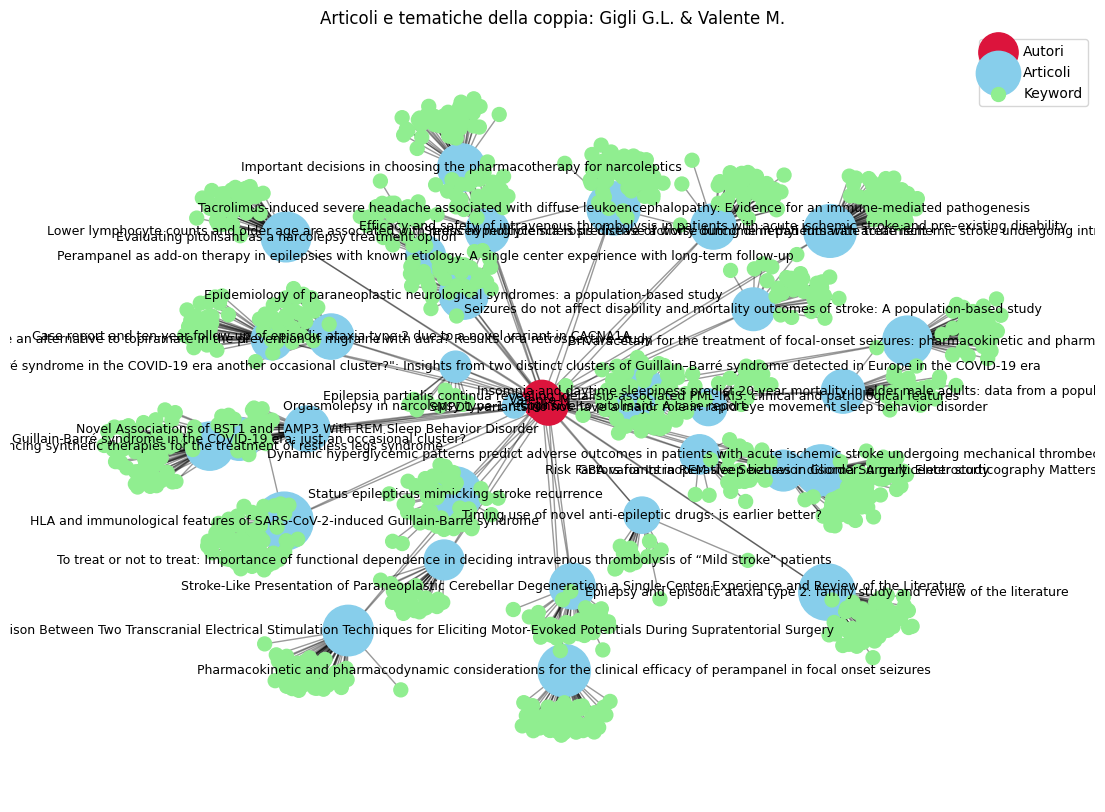

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------
# Prendi la prima coppia di autori
# -------------------------
if not pairs_df.empty:
    first_pair = pairs_df.iloc[0][["Author1","Author2"]].tolist()
else:
    print("pairs_df vuoto!")
    first_pair = []

target_authors = first_pair
print("Autori selezionati:", target_authors)

# -------------------------
# Prepara index_keywords_list se non esiste
# -------------------------
if "index_kw_list" not in df.columns:
    def split_index_kw(x):
        if pd.isna(x):
            return []
        return [k.strip().lower() for k in str(x).split(";") if k.strip()]
    df["index_kw_list"] = df["Index Keywords"].apply(split_index_kw)

# -------------------------
# Filtra articoli contenenti entrambi gli autori
# -------------------------
mask = df["authors_list"].apply(lambda lst: set(target_authors).issubset(set(lst)))
df_pair = df.loc[mask]

if df_pair.empty:
    print("Nessun articolo trovato per questa coppia.")
else:
    # -------------------------
    # Costruisci grafo autore ↔ articolo ↔ keyword
    # -------------------------
    G = nx.Graph()

    # Nodi autori
    for author in target_authors:
        G.add_node(author, type="author")

    # Nodi articoli + archi autore ↔ articolo
    for idx, row in df_pair.iterrows():
        title = row["Title"]
        keywords = row["index_kw_list"]
        G.add_node(title, type="article", count=len(keywords))
        # arco autore -> articolo
        for author in target_authors:
            G.add_edge(author, title)
        # nodi keyword + arco articolo -> keyword
        for kw in keywords:
            kw_node = f"{title} | {kw}"  # nodo keyword unico per articolo
            G.add_node(kw_node, type="keyword")
            G.add_edge(title, kw_node)

    # -------------------------
    # Visualizzazione
    # -------------------------
    pos = nx.spring_layout(G, k=0.8, seed=42)

    author_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="author"]
    article_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="article"]
    kw_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="keyword"]

    sizes_author = [800 for n in author_nodes]
    sizes_article = [300 + 20*G.nodes[n]["count"] for n in article_nodes]
    sizes_kw = [100 for n in kw_nodes]

    plt.figure(figsize=(14,10))
    nx.draw_networkx_nodes(G, pos, nodelist=author_nodes, node_color="crimson", node_size=sizes_author, label="Autori")
    nx.draw_networkx_nodes(G, pos, nodelist=article_nodes, node_color="skyblue", node_size=sizes_article, label="Articoli")
    nx.draw_networkx_nodes(G, pos, nodelist=kw_nodes, node_color="lightgreen", node_size=sizes_kw, label="Keyword")
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    
    # Etichette solo per autori e articoli
    labels = {n:n for n in author_nodes + article_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    plt.title(f"Articoli e tematiche della coppia: {target_authors[0]} & {target_authors[1]}")
    plt.axis("off")
    plt.legend(scatterpoints=1)
    plt.show()


Autori selezionati: ['Gigli G.L.', 'Valente M.']
Graphviz non disponibile, uso spring_layout


c:\Users\elimo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



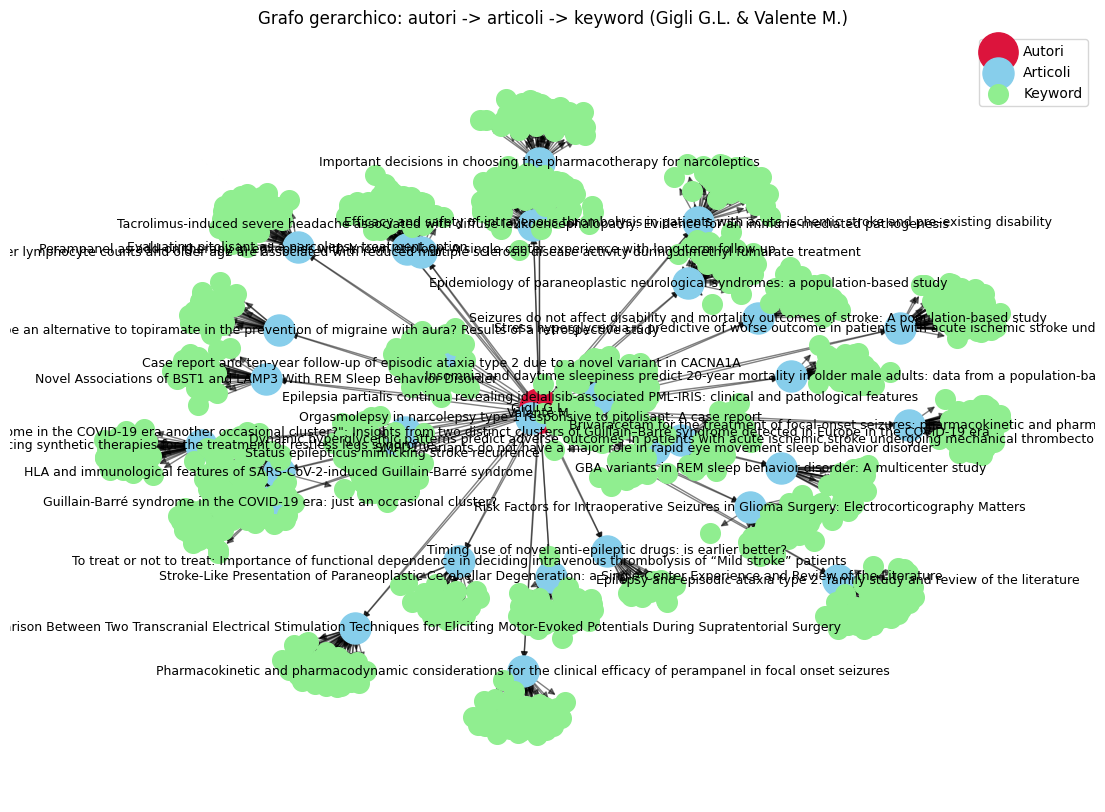

In [17]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# -------------------------
# Prendi la prima coppia da pairs_df
# -------------------------
if not pairs_df.empty:
    first_pair = pairs_df.iloc[0][["Author1","Author2"]].tolist()
else:
    print("pairs_df vuoto!")
    first_pair = []

target_authors = first_pair
print("Autori selezionati:", target_authors)

# -------------------------
# Prepara index_keywords_list se non esiste
# -------------------------
if "index_kw_list" not in df.columns:
    def split_index_kw(x):
        if pd.isna(x):
            return []
        return [k.strip().lower() for k in str(x).split(";") if k.strip()]
    df["index_kw_list"] = df["Index Keywords"].apply(split_index_kw)

# -------------------------
# Filtra articoli contenenti entrambi gli autori
# -------------------------
mask = df["authors_list"].apply(lambda lst: set(target_authors).issubset(set(lst)))
df_pair = df.loc[mask]

if df_pair.empty:
    print("Nessun articolo trovato per questa coppia.")
else:
    # -------------------------
    # Costruisci grafo gerarchico autore -> articolo -> keyword
    # -------------------------
    G = nx.DiGraph()  # grafo diretto per gerarchia

    # nodi autori
    for author in target_authors:
        G.add_node(author, type="author")

    # nodi articoli e keyword
    for idx, row in df_pair.iterrows():
        title = row["Title"]
        keywords = row["index_kw_list"]
        G.add_node(title, type="article")
        # arco autore -> articolo
        for author in target_authors:
            G.add_edge(author, title)
        # arco articolo -> keyword
        for kw in keywords:
            kw_node = f"{title} | {kw}"
            G.add_node(kw_node, type="keyword")
            G.add_edge(title, kw_node)

    # -------------------------
    # Layout gerarchico con pygraphviz (dot)
    # -------------------------
    try:
        pos = graphviz_layout(G, prog="dot")
    except:
        print("Graphviz non disponibile, uso spring_layout")
        pos = nx.spring_layout(G, k=1.0, seed=42)

    # -------------------------
    # Visualizzazione
    # -------------------------
    author_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="author"]
    article_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="article"]
    kw_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="keyword"]

    plt.figure(figsize=(14,10))
    nx.draw_networkx_nodes(G, pos, nodelist=author_nodes, node_color="crimson", node_size=800, label="Autori")
    nx.draw_networkx_nodes(G, pos, nodelist=article_nodes, node_color="skyblue", node_size=500, label="Articoli")
    nx.draw_networkx_nodes(G, pos, nodelist=kw_nodes, node_color="lightgreen", node_size=200, label="Keyword")
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Etichette solo per autori e articoli
    labels = {n:n for n in author_nodes + article_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    plt.title(f"Grafo gerarchico: autori -> articoli -> keyword ({target_authors[0]} & {target_authors[1]})")
    plt.axis("off")
    plt.legend(scatterpoints=1)
    plt.show()


Autori selezionati: ['Gigli G.L.', 'Valente M.']
Graphviz non disponibile, uso spring_layout


c:\Users\elimo\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



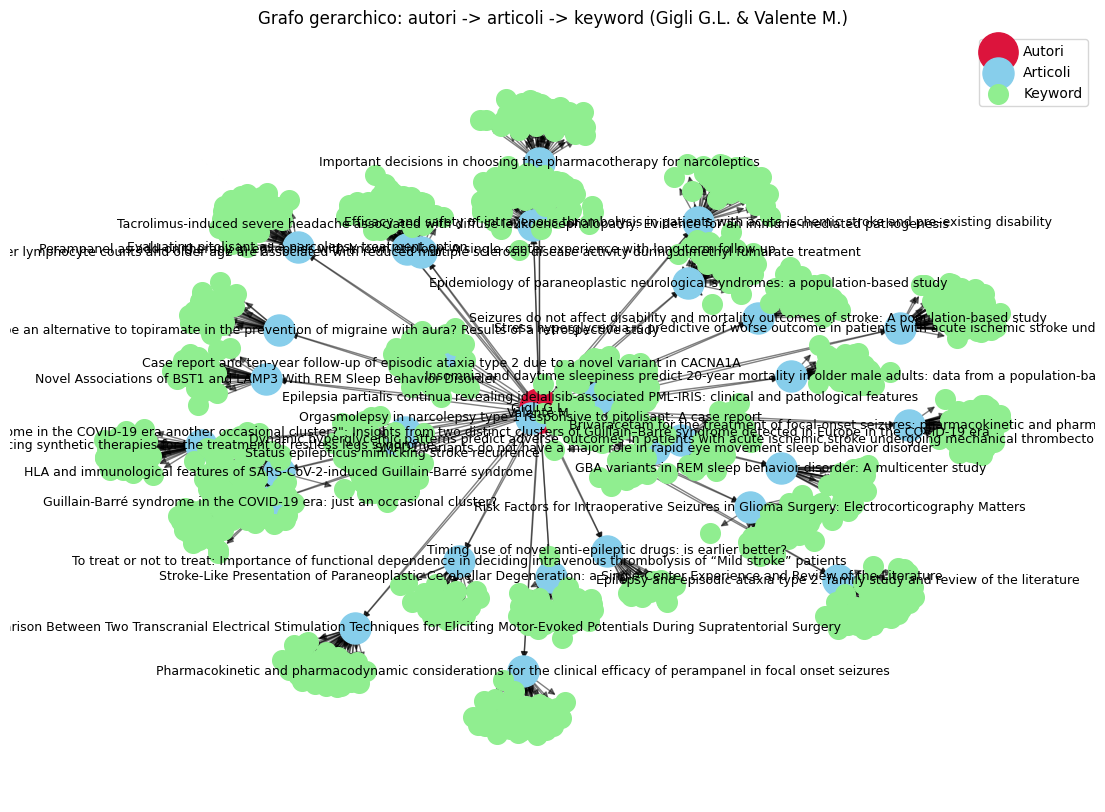

In [18]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# -------------------------
# Prendi la prima coppia da pairs_df
# -------------------------
if not pairs_df.empty:
    first_pair = pairs_df.iloc[0][["Author1","Author2"]].tolist()
else:
    print("pairs_df vuoto!")
    first_pair = []

target_authors = first_pair
print("Autori selezionati:", target_authors)

# -------------------------
# Prepara index_keywords_list se non esiste
# -------------------------
if "index_kw_list" not in df.columns:
    def split_index_kw(x):
        if pd.isna(x):
            return []
        return [k.strip().lower() for k in str(x).split(";") if k.strip()]
    df["index_kw_list"] = df["Index Keywords"].apply(split_index_kw)

# -------------------------
# Filtra articoli contenenti entrambi gli autori
# -------------------------
mask = df["authors_list"].apply(lambda lst: set(target_authors).issubset(set(lst)))
df_pair = df.loc[mask]

if df_pair.empty:
    print("Nessun articolo trovato per questa coppia.")
else:
    # -------------------------
    # Costruisci grafo gerarchico autore -> articolo -> keyword
    # -------------------------
    G = nx.DiGraph()  # grafo diretto per gerarchia

    # nodi autori
    for author in target_authors:
        G.add_node(author, type="author")

    # nodi articoli e keyword
    for idx, row in df_pair.iterrows():
        title = row["Title"]
        keywords = row["index_kw_list"]
        G.add_node(title, type="article")
        # arco autore -> articolo
        for author in target_authors:
            G.add_edge(author, title)
        # arco articolo -> keyword
        for kw in keywords:
            kw_node = f"{title} | {kw}"
            G.add_node(kw_node, type="keyword")
            G.add_edge(title, kw_node)

    # -------------------------
    # Layout gerarchico con pygraphviz (dot)
    # -------------------------
    try:
        pos = graphviz_layout(G, prog="dot")
    except:
        print("Graphviz non disponibile, uso spring_layout")
        pos = nx.spring_layout(G, k=1.0, seed=42)

    # -------------------------
    # Visualizzazione
    # -------------------------
    author_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="author"]
    article_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="article"]
    kw_nodes = [n for n,d in G.nodes(data=True) if d["type"]=="keyword"]

    plt.figure(figsize=(14,10))
    nx.draw_networkx_nodes(G, pos, nodelist=author_nodes, node_color="crimson", node_size=800, label="Autori")
    nx.draw_networkx_nodes(G, pos, nodelist=article_nodes, node_color="skyblue", node_size=500, label="Articoli")
    nx.draw_networkx_nodes(G, pos, nodelist=kw_nodes, node_color="lightgreen", node_size=200, label="Keyword")
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Etichette solo per autori e articoli
    labels = {n:n for n in author_nodes + article_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=9)

    plt.title(f"Grafo gerarchico: autori -> articoli -> keyword ({target_authors[0]} & {target_authors[1]})")
    plt.axis("off")
    plt.legend(scatterpoints=1)
    plt.show()


Autori selezionati: {'Gigli G.L.', 'Valente M.'}


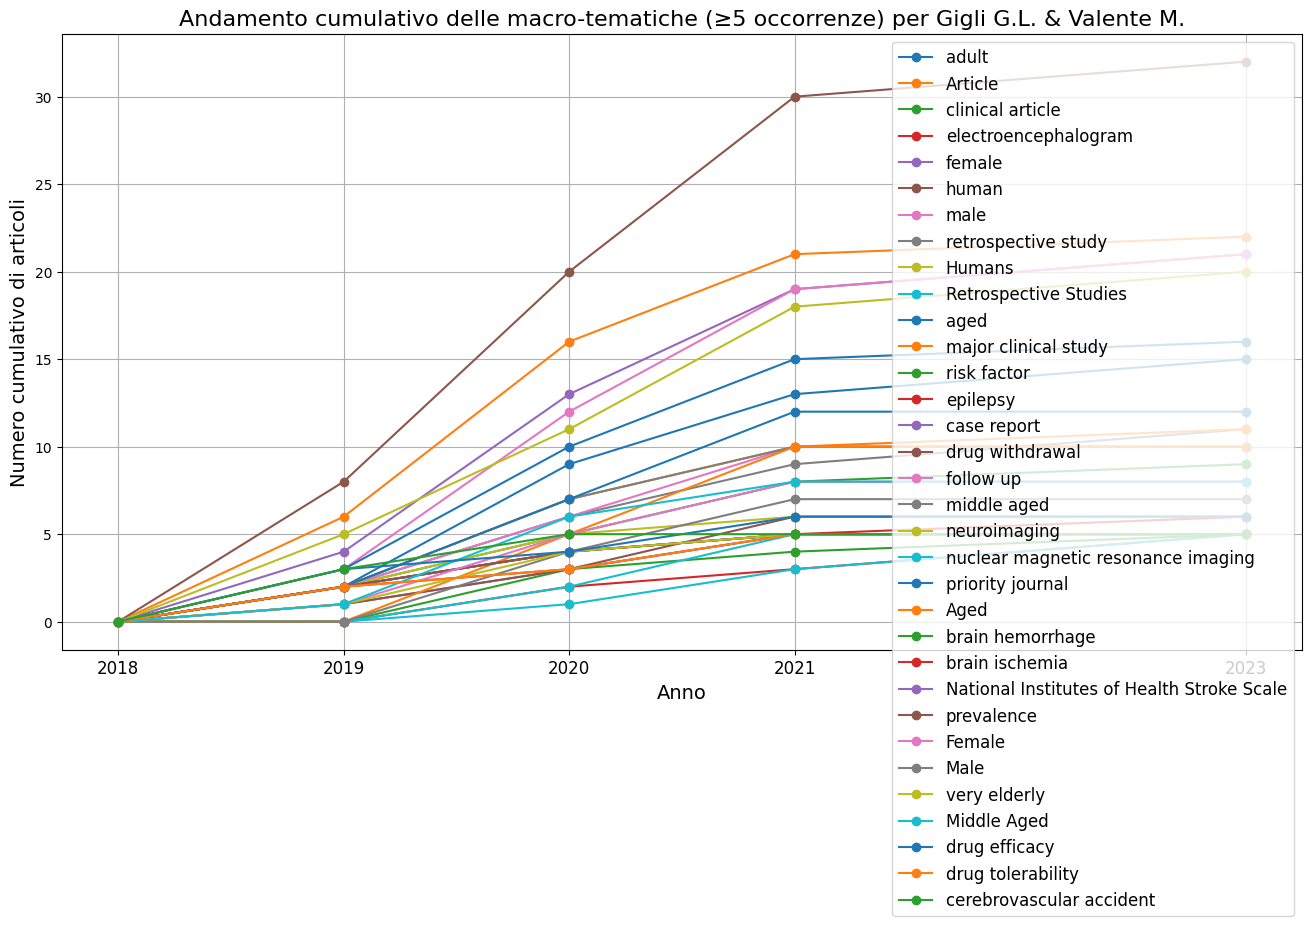

In [30]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# -------------------------
# Prendi la prima coppia da pairs_df
# -------------------------
if not pairs_df.empty:
    first_pair = pairs_df.iloc[0][["Author1","Author2"]].tolist()
else:
    print("pairs_df vuoto!")
    first_pair = []

target_authors = set(first_pair)
print("Autori selezionati:", target_authors)

# -------------------------
# Prepara index_keywords_list se non esiste
# -------------------------
if "index_kw_list" not in df.columns:
    def split_index_kw(x):
        if pd.isna(x):
            return []
        return [k.strip().lower() for k in str(x).split(";") if k.strip()]
    df["index_kw_list"] = df["Index Keywords"].apply(split_index_kw)

# -------------------------
# Filtra articoli contenenti entrambi gli autori
# -------------------------
mask = df["authors_list"].apply(lambda lst: target_authors.issubset(set(lst)))
df_pair = df.loc[mask]

if df_pair.empty:
    print("Nessun articolo trovato per questa coppia.")
else:
    # -------------------------
    # Conta tutte le keyword
    # -------------------------
    all_kw = [kw for kws in df_pair["index_kw_list"] for kw in kws]
    kw_counts = Counter(all_kw)

    # Applica soglia minima: almeno 5 occorrenze
    min_occurrences = 5
    top_keywords = [kw for kw, cnt in kw_counts.items() if cnt >= min_occurrences]

    if not top_keywords:
        print(f"Nessuna keyword compare almeno {min_occurrences} volte.")
    else:
        # -------------------------
        # Crea struttura anno -> keyword -> count
        # -------------------------
        data = {}
        for anno, df_anno in df_pair.groupby("Year"):
            if pd.isna(anno):
                continue
            counts = Counter([kw for kws in df_anno["index_kw_list"] for kw in kws])
            data[int(anno)] = {kw: counts.get(kw, 0) for kw in top_keywords}

        df_trend = pd.DataFrame(data).T.sort_index()

        # -------------------------
        # Aggiungi 2018 se mancante
        # -------------------------
        if 2018 not in df_trend.index:
            df_trend.loc[2018] = {kw: 0 for kw in top_keywords}
            df_trend = df_trend.sort_index()

        # -------------------------
        # Cumulativo anno per anno
        # -------------------------
        df_trend_cumsum = df_trend.cumsum()

        # -------------------------
        # Grafico
        # -------------------------
        plt.figure(figsize=(16,8))  # aumento delle dimensioni
        for kw in top_keywords:
            plt.plot(df_trend_cumsum.index, df_trend_cumsum[kw], marker='o', label=kw)

        plt.title(f"Andamento cumulativo delle macro-tematiche (≥{min_occurrences} occorrenze) per {first_pair[0]} & {first_pair[1]}", fontsize=16)
        plt.xlabel("Anno", fontsize=14)
        plt.ylabel("Numero cumulativo di articoli", fontsize=14)
        plt.grid(True)
        plt.legend(fontsize=12)

        # Imposta gli anni consecutivi come xticks
        plt.xticks(sorted(df_trend_cumsum.index), fontsize=12)

        plt.show()


Autori selezionati: {'Gigli G.L.', 'Valente M.'}


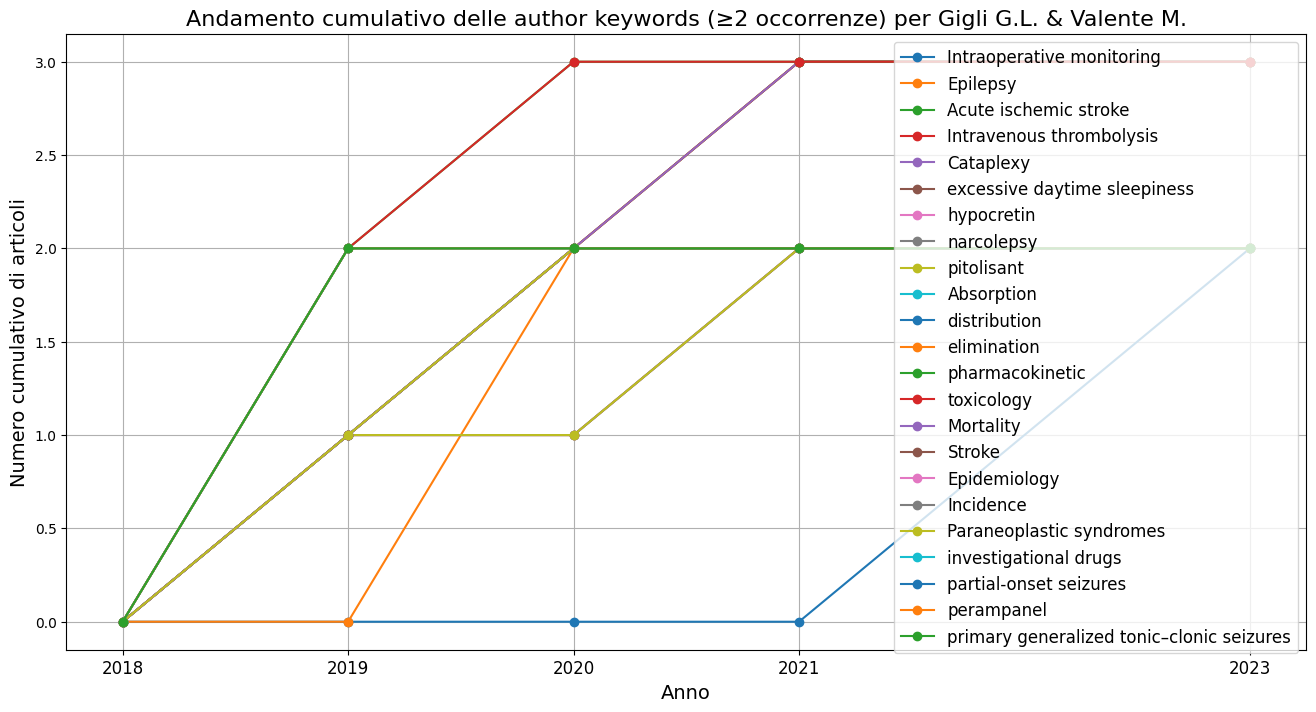

In [31]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# -------------------------
# Prendi la prima coppia da pairs_df
# -------------------------
if not pairs_df.empty:
    first_pair = pairs_df.iloc[0][["Author1","Author2"]].tolist()
else:
    print("pairs_df vuoto!")
    first_pair = []

target_authors = set(first_pair)
print("Autori selezionati:", target_authors)

# -------------------------
# Prepara author_keywords_list se non esiste
# -------------------------
if "author_kw_list" not in df.columns:
    def split_author_kw(x):
        if pd.isna(x):
            return []
        return [k.strip().lower() for k in str(x).split(";") if k.strip()]
    df["author_kw_list"] = df["Author Keywords"].apply(split_author_kw)

# -------------------------
# Filtra articoli contenenti entrambi gli autori
# -------------------------
mask = df["authors_list"].apply(lambda lst: target_authors.issubset(set(lst)))
df_pair = df.loc[mask]

if df_pair.empty:
    print("Nessun articolo trovato per questa coppia.")
else:
    # -------------------------
    # Conta tutte le author keywords
    # -------------------------
    all_kw = [kw for kws in df_pair["author_kw_list"] for kw in kws]
    kw_counts = Counter(all_kw)

    # Applica soglia minima: almeno 3 occorrenze
    min_occurrences = 2
    top_keywords = [kw for kw, cnt in kw_counts.items() if cnt >= min_occurrences]

    if not top_keywords:
        print(f"Nessuna author keyword compare almeno {min_occurrences} volte.")
    else:
        # -------------------------
        # Crea struttura anno -> keyword -> count
        # -------------------------
        data = {}
        for anno, df_anno in df_pair.groupby("Year"):
            if pd.isna(anno):
                continue
            counts = Counter([kw for kws in df_anno["author_kw_list"] for kw in kws])
            data[int(anno)] = {kw: counts.get(kw, 0) for kw in top_keywords}

        df_trend = pd.DataFrame(data).T.sort_index()

        # -------------------------
        # Aggiungi 2018 se mancante
        # -------------------------
        if 2018 not in df_trend.index:
            df_trend.loc[2018] = {kw: 0 for kw in top_keywords}
            df_trend = df_trend.sort_index()

        # -------------------------
        # Cumulativo anno per anno
        # -------------------------
        df_trend_cumsum = df_trend.cumsum()

        # -------------------------
        # Grafico
        # -------------------------
        plt.figure(figsize=(16,8))  # dimensione più grande
        for kw in top_keywords:
            plt.plot(df_trend_cumsum.index, df_trend_cumsum[kw], marker='o', label=kw)

        plt.title(f"Andamento cumulativo delle author keywords (≥{min_occurrences} occorrenze) per {first_pair[0]} & {first_pair[1]}", fontsize=16)
        plt.xlabel("Anno", fontsize=14)
        plt.ylabel("Numero cumulativo di articoli", fontsize=14)
        plt.grid(True)
        plt.legend(fontsize=12)

        # Imposta gli anni consecutivi come xticks
        plt.xticks(sorted(df_trend_cumsum.index), fontsize=12)

        plt.show()


## da fare
- visualizzazre con networkx
- cambiare il pallino rosso e fare in modo che si ingrandisca
- calcolare centralita e cose con tabella: DONE
- almeno un altra analisi del grado circa
### Layout:
1. pos = nx.spring_layout(G, k=0.5, iterations=100) 
2. pos = nx.circular_layout(G)
3. pos = nx.shell_layout(G, nlist=[lista_nodi_interno, lista_nodi_esterno])
4. pos = nx.kamada_kawai_layout(G)
5. pos = nx.spectral_layout(G)
6. pos = nx.random_layout(G)
7. pos = nx.planar_layout(G)
8. pos = nx.bipartite_layout(G, nodes_set_A)
9. pos = nx.multipartite_layout(G, subset_key="layer")

In [21]:
## PER FILTRARE MEGLIO
centrality = nx.degree_centrality(G)
threshold = 0.05  # tieni solo i nodi più centrali
nodes_to_keep = [n for n, c in centrality.items() if c >= threshold]
G_filt = G.subgraph(nodes_to_keep).copy()


## Calcolo degli indici di centralità 
Creazione di una tabella per ogni autore che descrive degree-centrality, betweenness e closenesss.

In [22]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pd.DataFrame({
    "degree": degree_centrality,
    "betweenness": betweenness_centrality,
    "closeness": closeness_centrality
}).sort_values("degree", ascending=False)


degree  betweenness  \
HLA and immunological features of SARS-CoV-2-in...  0.059564     0.000097   
Epilepsy and episodic ataxia type 2: family stu...  0.055369     0.000090   
Epilepsia partialis continua revealing idelalis...  0.053691     0.000087   
Tacrolimus-induced severe headache associated w...  0.046980     0.000076   
Pharmacokinetic and pharmacodynamic considerati...  0.046141     0.000075   
...                                                      ...          ...   
Pharmacokinetic and pharmacodynamic considerati...  0.000839     0.000000   
Pharmacokinetic and pharmacodynamic considerati...  0.000839     0.000000   
Pharmacokinetic and pharmacodynamic considerati...  0.000839     0.000000   
Pharmacokinetic and pharmacodynamic considerati...  0.000839     0.000000   
Pharmacokinetic and pharmacodynamic considerati...  0.000839     0.000000   

                                                    closeness  
HLA and immunological features of SARS-CoV-2-in...   0.001678  
Epilepsy and episodic ataxia type 2: family stu...   0.001678  
Epilepsia partialis continua revealing idelalis...   0.001678  
Tacrolimus-induced severe headache associated w...   0.001678  
Pharmacokinetic and pharmacodynamic considerati...   0.001678  
...                                                       ...  
Pharmacokinetic and pharmacodynamic considerati...   0.001510  
Pharmacokinetic and pharmacodynamic considerati...   0.001510  
Pharmacokinetic and pharmacodynamic considerati...   0.001510  
Pharmacokinetic and pharmacodynamic considerati...   0.001510  
Pharmacokinetic and pharmacodynamic considerati...   0.001510  

[1193 rows x 3 columns]

## Prova keyword autori

In [23]:
import re

def split_keywords(x):
    if pd.isna(x):
        return []
    return [k.strip() for k in re.split(r'[;,|]', x) if k.strip()]

df["author_kw_list"] = df["Author Keywords"].apply(split_keywords)
df["index_kw_list"] = df["Index Keywords"].apply(split_keywords)

df["all_keywords"] = df.apply(
    lambda row: list(set(row["author_kw_list"] + row["index_kw_list"])),
    axis=1
)

In [24]:
G_kw = nx.Graph()

for _, row in df.iterrows():
    article = row["Title"]
    keywords = row["all_keywords"]

    for kw in keywords:
        G_kw.add_node(article, type="article")
        G_kw.add_node(kw, type="keyword")
        G_kw.add_edge(article, kw)

In [25]:
G_prof_kw = nx.Graph()

for _, row in df.iterrows():
    authors = row["authors_list"]
    keywords = row["all_keywords"]

    if not isinstance(authors, list):
        continue

    for a in authors:
        for kw in keywords:
            G_prof_kw.add_node(a, type="author")
            G_prof_kw.add_node(kw, type="keyword")
            G_prof_kw.add_edge(a, kw)

In [26]:
def filter_by_centrality(G, threshold=0.03):
    centrality = nx.degree_centrality(G)
    nodes_to_keep = [n for n, c in centrality.items() if c >= threshold]
    return G.subgraph(nodes_to_keep).copy(), centrality

In [27]:
G_kw_filt, cent_kw = filter_by_centrality(G_kw, threshold=0.01)
G_prof_kw_filt, cent_prof = filter_by_centrality(G_prof_kw, threshold=0.03)

In [28]:
def draw_kamada(G, centrality, title):
    pos = nx.kamada_kawai_layout(G)

    sizes = [centrality[n] * 2000 for n in G.nodes()]
    colors = [
        "gold" if G.nodes[n]["type"]=="article" else
        "skyblue" if G.nodes[n]["type"]=="author" else
        "purple"
        for n in G.nodes()
    ]

    plt.figure(figsize=(16,14))
    nx.draw(
        G, pos,
        node_size=sizes,
        node_color=colors,
        with_labels=False,
        alpha=0.85
    )

    labels = {
        n: n for n in G.nodes()
        if centrality[n] >= sorted(centrality.values())[-10]  # top 10
    }

    nx.draw_networkx_labels(G, pos, labels, font_size=9)
    plt.title(title)
    plt.show()

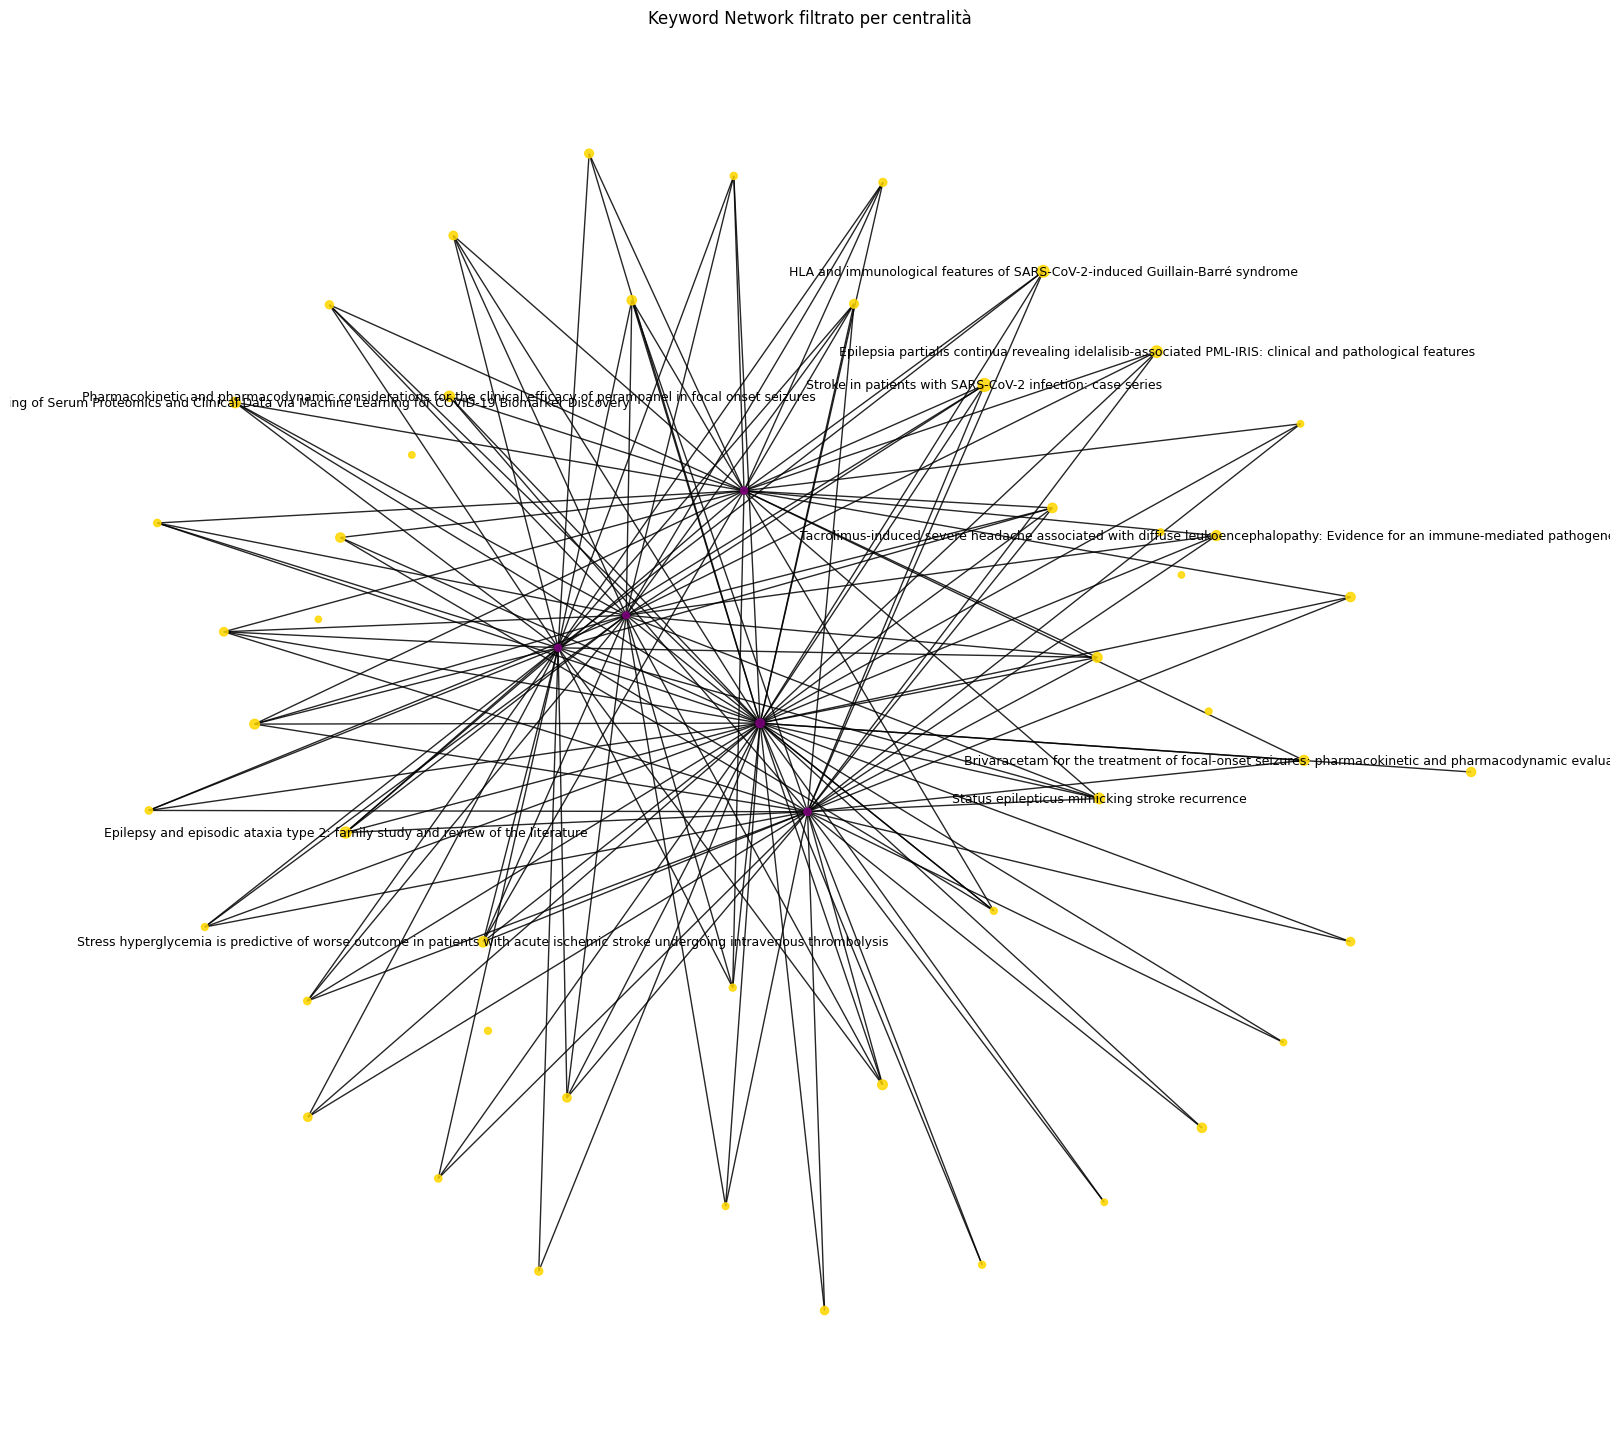

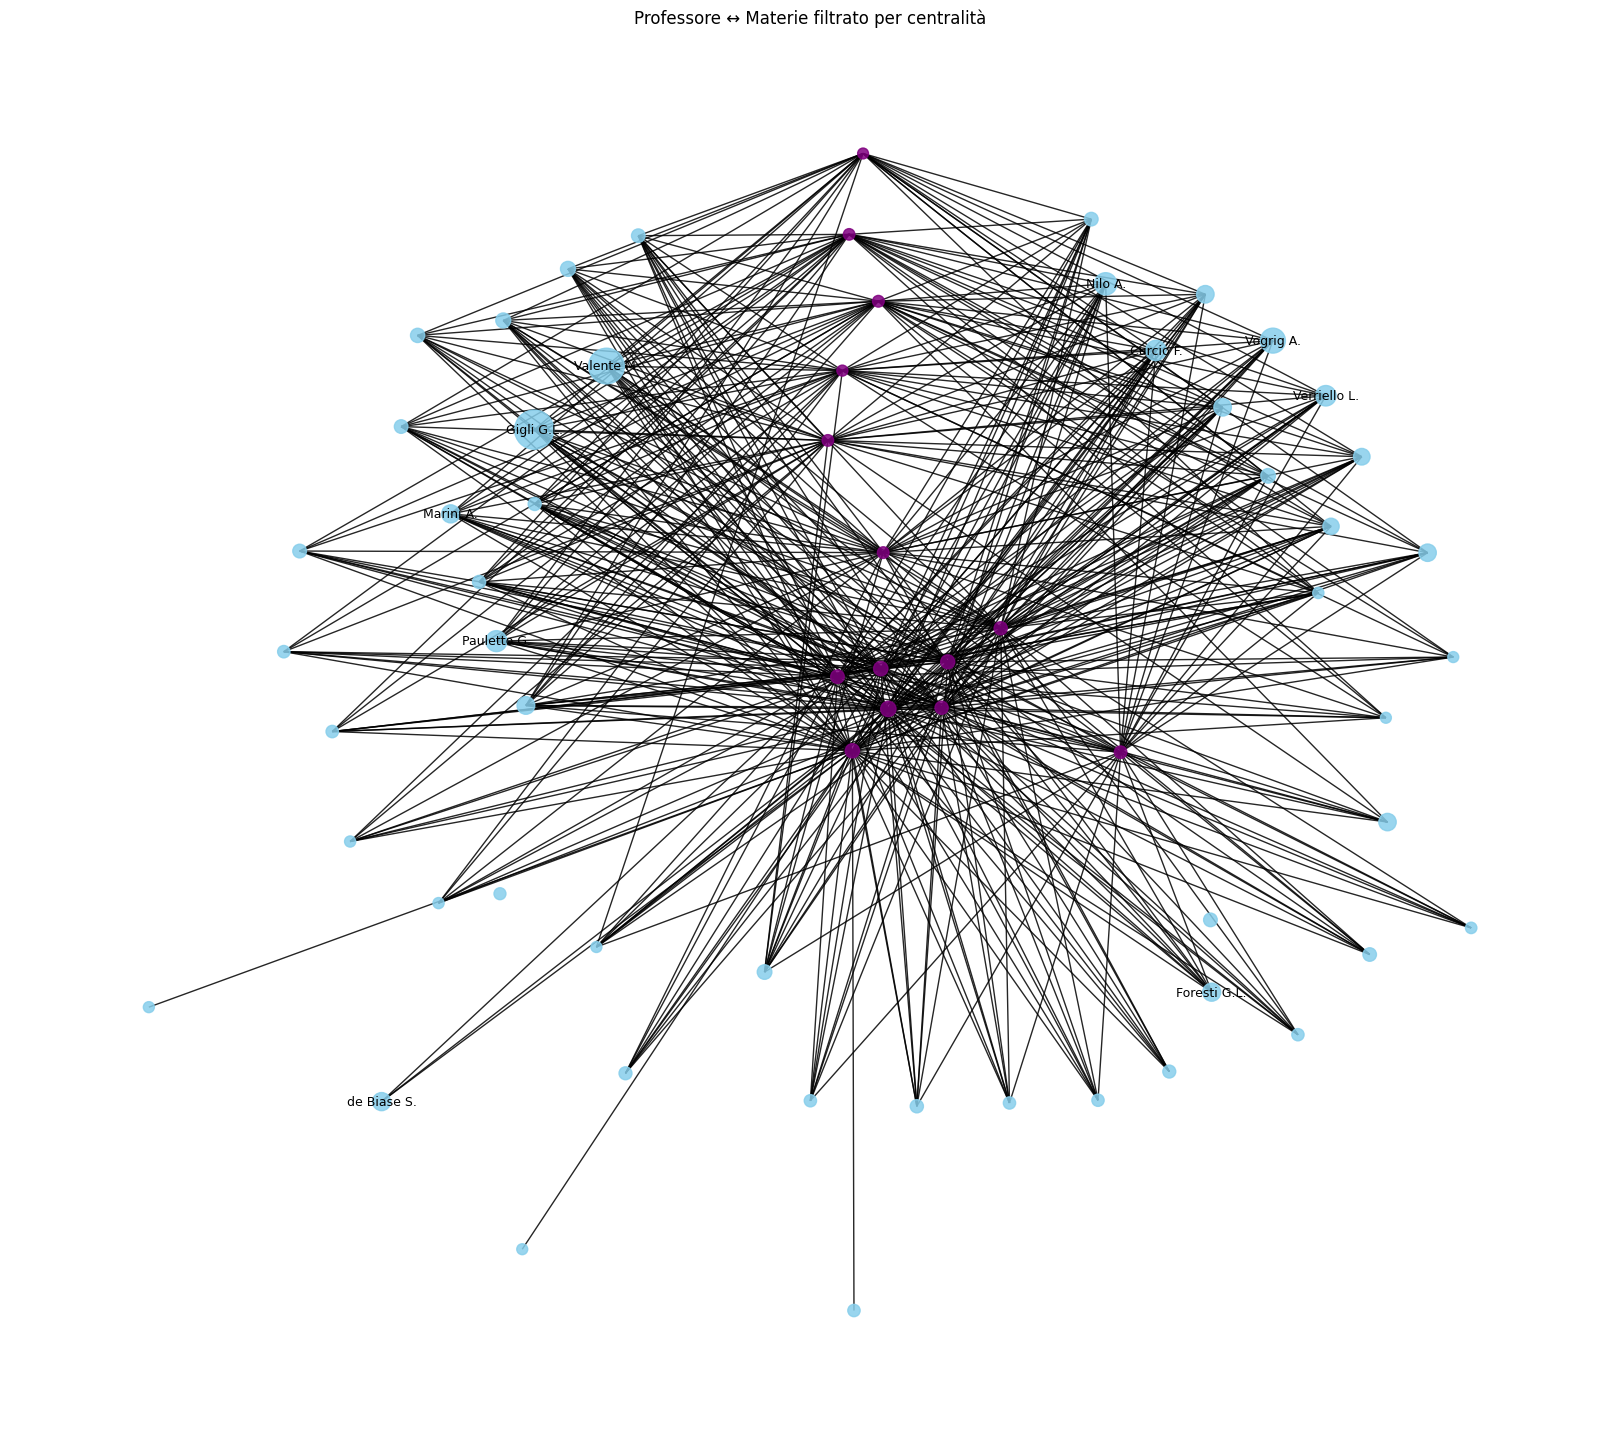

In [29]:
draw_kamada(G_kw_filt, cent_kw, "Keyword Network filtrato per centralità")
draw_kamada(G_prof_kw_filt, cent_prof, "Professore ↔ Materie filtrato per centralità")